In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Water_Quality_Prediction.csv')

In [3]:
df.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [4]:
df.shape

(1048575, 24)

In [5]:
df.isnull().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

In [6]:
df.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,1.048575e+06,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,...,1.014050e+06,1.019772e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.018887e+06,1.043272e+06,1.031026e+06,1.028214e+06,1.048575e+06
mean,5.242870e+05,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,...,1.446009e+02,4.248376e+02,3.236978e+00,9.352826e-02,2.647872e+02,1.915360e+01,6.003251e+01,1.573196e+01,1.149062e+01,2.295821e-01
std,3.026977e+05,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,...,6.672156e+01,1.897561e+02,7.150808e-01,4.403703e-01,1.543697e+02,1.137963e+01,1.808397e+01,8.798726e+00,6.925925e+00,4.205643e-01
min,0.000000e+00,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,...,1.194073e+01,1.305482e+01,9.994110e-01,1.380000e-46,1.064299e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,...,9.746143e+01,2.863260e+02,2.737515e+00,2.060000e-06,1.318069e+02,1.135982e+01,4.784209e+01,8.000000e+00,5.000000e+00,0.000000e+00
50%,5.242870e+05,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,...,1.339778e+02,3.970023e+02,3.198937e+00,5.372950e-04,2.635694e+02,1.646738e+01,6.002168e+01,1.600000e+01,1.100000e+01,0.000000e+00
75%,7.864305e+05,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,...,1.803459e+02,5.333383e+02,3.685177e+00,1.369394e-02,3.949597e+02,2.386571e+01,7.223478e+01,2.300000e+01,1.700000e+01,0.000000e+00
max,1.048574e+06,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,...,1.393433e+03,1.891516e+03,1.068842e+01,2.374086e+01,5.797995e+02,2.430051e+02,1.440785e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

In [8]:
cols_to_drop = [
    'Copper',     # High missing, likely not essential
    'Sulfate',    # High missing, possibly redundant
    'Odor'        # Subjective + high missing
]
df.drop(columns=cols_to_drop, inplace=True)


In [9]:
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,...,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,14.0,0
1048571,1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,...,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0.0,0
1048572,1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,...,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,16.0,0
1048573,1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,Near Colorless,0.156424,0.554729,...,2.803234,3.220000e-19,278.051032,Well,7.351956,65.055864,May,5.0,3.0,0


In [10]:
df['Target'].value_counts()

Target
0    807841
1    240734
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

In [12]:
missing_rows = df.isnull().any(axis=1).sum()
print(f"Rows with at least one missing value: {missing_rows}")
print(f"Percentage of total data: {100 * missing_rows / len(df):.2f}%")


Rows with at least one missing value: 275518
Percentage of total data: 26.28%


In [13]:
y=df['Target']   # or whatever your backup target variable is


In [14]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Target', errors='ignore')
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])


In [15]:
df.isnull().sum()

Index                         0
pH                            0
Iron                          0
Nitrate                       0
Chloride                      0
Lead                          0
Zinc                          0
Color                       981
Turbidity                     0
Fluoride                      0
Conductivity                  0
Chlorine                      0
Manganese                     0
Total Dissolved Solids        0
Source                    15535
Water Temperature             0
Air Temperature               0
Month                     16921
Day                           0
Time of Day                   0
Target                        0
dtype: int64

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')

df[cat_cols] = pd.DataFrame(
    cat_imputer.fit_transform(df[cat_cols]),
    columns=cat_cols,
    index=df.index
)


In [17]:
df.isnull().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

In [18]:
df['Source'].value_counts()

Source
Well         145189
Aquifer      129609
Stream       129574
Ground       129433
River        128978
Lake         128637
Reservoir    128582
Spring       128573
Name: count, dtype: int64

In [19]:
df['Month'].value_counts()

Month
January      105138
August        87855
May           87698
March         87585
July          87464
October       87441
December      87314
June          84909
April         84744
November      84645
September     84461
February      79321
Name: count, dtype: int64

In [20]:
df['Color'].value_counts()

Color
Colorless         327014
Near Colorless    325799
Faint Yellow      188039
Light Yellow      124775
Yellow             82948
Name: count, dtype: int64

In [21]:
df['Time of Day'].value_counts()

Time of Day
11.0    63115
0.0     43267
5.0     43124
23.0    43082
3.0     43011
1.0     42997
16.0    42990
9.0     42961
12.0    42914
15.0    42905
19.0    42900
22.0    42866
18.0    42864
10.0    42864
13.0    42852
2.0     42829
14.0    42760
7.0     42751
6.0     42732
8.0     42638
20.0    42601
4.0     42590
17.0    42524
21.0    42438
Name: count, dtype: int64

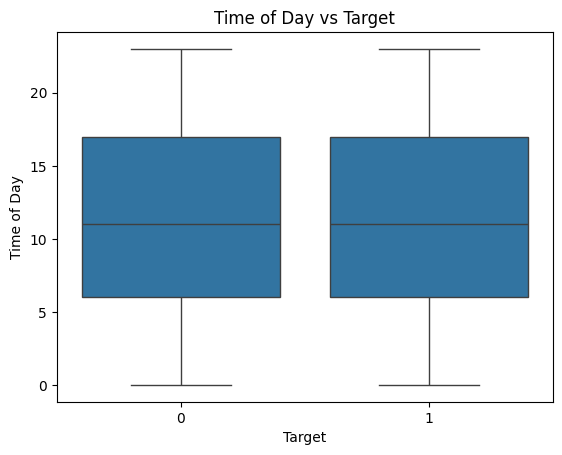

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Target', y='Time of Day', data=df)
plt.title('Time of Day vs Target')
plt.show()


In [23]:
df.drop(columns=['Time of Day','Index'], axis=1, inplace=True)


In [24]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Target
0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,471.683357,3.708178,2.270000e-15,332.118789,Well,16.467383,43.493324,January,29.0,0
1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,432.844908,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,0
2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,0
3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,237.028468,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,0
4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,227.409325,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,0
1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,124.828663,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0
1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,337.630357,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,0
1048573,6.897232,6.980000e-10,5.757980,125.564223,1.300000e-18,0.804589,Near Colorless,0.156424,0.554729,569.077747,2.803234,3.220000e-19,278.051032,Well,7.351956,65.055864,May,5.0,0


In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define columns
categorical_cols = ['Color', 'Source', 'Month']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Target', errors='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

# Split data
x = df.drop('Target', axis=1)
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# Transform
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

print("✅ Preprocessing done. Shape:", x_train_preprocessed.shape)


✅ Preprocessing done. Shape: (838860, 37)


In [26]:
print(y_train.value_counts())


Target
0    646273
1    192587
Name: count, dtype: int64


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train_preprocessed, y_train)

print("After SMOTE:", y_train_bal.value_counts())


After SMOTE: Target
0    646273
1    646273
Name: count, dtype: int64


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

🔍 Model: Decision Tree
✅ Accuracy: 81.98%
              precision    recall  f1-score   support

           0       0.90      0.87      0.88    161568
           1       0.60      0.67      0.63     48147

    accuracy                           0.82    209715
   macro avg       0.75      0.77      0.76    209715
weighted avg       0.83      0.82      0.82    209715



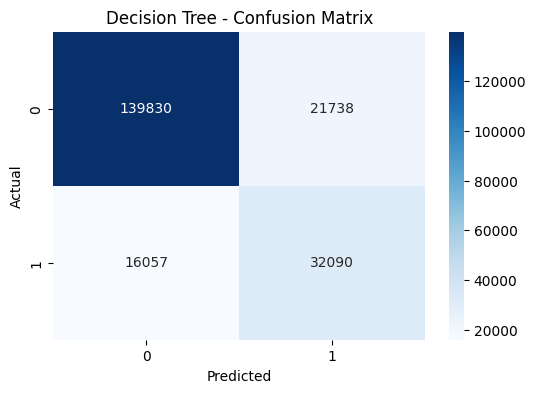

--------------------------------------------------
🔍 Model: Naive Bayes
✅ Accuracy: 82.17%
              precision    recall  f1-score   support

           0       0.87      0.90      0.89    161568
           1       0.62      0.56      0.59     48147

    accuracy                           0.82    209715
   macro avg       0.75      0.73      0.74    209715
weighted avg       0.82      0.82      0.82    209715



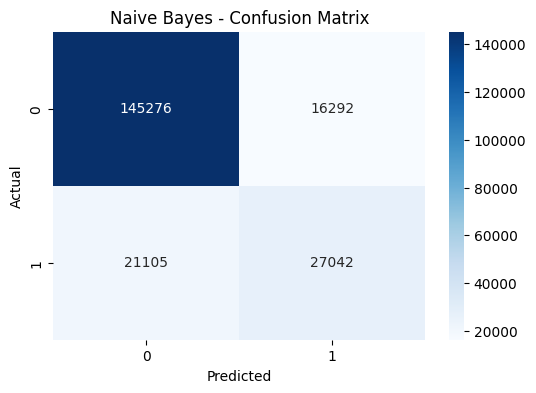

--------------------------------------------------
🔍 Model: Random Forest
✅ Accuracy: 86.96%
              precision    recall  f1-score   support

           0       0.98      0.85      0.91    161568
           1       0.65      0.94      0.77     48147

    accuracy                           0.87    209715
   macro avg       0.81      0.89      0.84    209715
weighted avg       0.90      0.87      0.88    209715



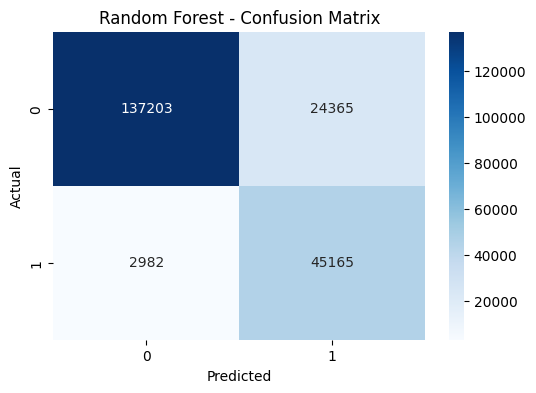

--------------------------------------------------


In [29]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=42)),
]

for name, clf in models:
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),       # Your ColumnTransformer
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])

    pipeline.fit(x_train, y_train)            # Raw training data
    y_pred = pipeline.predict(x_test)         # Raw test data

    print(f"🔍 Model: {name}")
    print(f"✅ Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * 50)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END classifier__max_depth=20, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.5min
[CV] END classifier__max_depth=20, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.5min
[CV] END classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  33.9s
[CV] END classifier__max_depth=None, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  33.6s
[CV] END classifier__max_depth=20, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=  26.7s
[CV] END classifier__max_depth=20, 

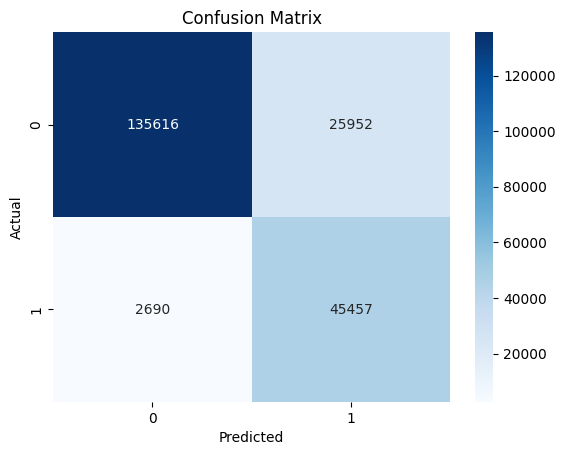

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 1. Sample smaller training set
x_small = x_train.sample(n=100000, random_state=42)
y_small = y_train.loc[x_small.index]

# 2. Define the pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 3. Define hyperparameter space
param_dist = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

# 4. Randomized search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring='recall',  # Focus on minority class recall
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# 5. Fit on sampled data
random_search.fit(x_small, y_small)

# 6. Evaluate on full test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Best Parameters:", random_search.best_params_)
print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


🎯 Final Model Evaluation on Test Set
✅ Accuracy: 86.39%
              precision    recall  f1-score   support

           0       0.98      0.84      0.90    161568
           1       0.64      0.95      0.76     48147

    accuracy                           0.86    209715
   macro avg       0.81      0.89      0.83    209715
weighted avg       0.90      0.86      0.87    209715



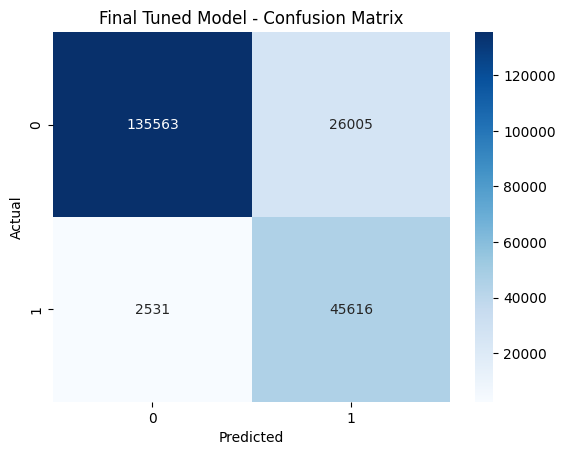

In [31]:
# Final tuned model pipeline
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    ))
])

# Fit on full training data
final_pipeline.fit(x_train, y_train)

# Predict on test set
y_final_pred = final_pipeline.predict(x_test)

# Evaluation
print("🎯 Final Model Evaluation on Test Set")
print(f"✅ Accuracy: {round(accuracy_score(y_test, y_final_pred)*100, 2)}%")
print(classification_report(y_test, y_final_pred))

sns.heatmap(confusion_matrix(y_test, y_final_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Final Tuned Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### safe water sample prediction


In [ ]:
import pandas as pd

# Sample input in the correct format
test_data = {
    'pH': [7.45294],
    'Iron': [1.280000e-10],
    'Nitrate': [4.646518],
    'Chloride': [126.838658],
    'Lead': [5.100000e-28],
    'Zinc': [0.047645],
    'Color': ['Colorless'],
    'Turbidity': [0.026987],
    'Fluoride': [0.663294],
    'Conductivity': [416.760659],
    'Chlorine': [3.252276],
    'Manganese': [0.027935],
    'Total Dissolved Solids': [127.253348],
    'Source': ['Reservoir'],
    'Water Temperature': [19.07164],
    'Air Temperature': [70.36231],
    'Month': ['August'],
    'Day': [5.0]
}

test_df = pd.DataFrame(test_data)

# Predict class and probability
pred = final_pipeline.predict(test_df)
proba = final_pipeline.predict_proba(test_df)

# Better formatted output
label = "Safe" if pred[0] == 0 else "Not Safe"
prob_safe = round(proba[0][0] * 100, 2)
prob_not_safe = round(proba[0][1] * 100, 2)

print(f"✅ Prediction: {label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")

threshold = 0.4
custom_pred = 1 if proba[0][1] > threshold else 0
label = "Safe" if custom_pred == 0 else "Not Safe"

print(f"✅ Custom Threshold Prediction: {label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")






✅ Prediction: Safe
🔢 Safe: 96.0% | Not Safe: 4.0%
✅ Custom Threshold Prediction: Safe
🔢 Safe: 96.0% | Not Safe: 4.0%


#### Not safe water sample prediction

In [35]:
import pandas as pd

# Sample input representing unsafe water
test_data = {
    'pH': [3.2],  # very acidic
    'Iron': [3.5],  # high iron
    'Nitrate': [80.0],  # unsafe nitrate level
    'Chloride': [350.0],  # high chloride
    'Lead': [0.1],  # unsafe lead level
    'Zinc': [1.0],
    'Color': ['Yellow'],  # darkest category
    'Turbidity': [10.0],  # very turbid
    'Fluoride': [4.5],  # above safe limits
    'Conductivity': [1200.0],  # high conductivity
    'Chlorine': [6.0],  # excessive chlorine
    'Manganese': [0.6],  # very high
    'Total Dissolved Solids': [1400.0],  # above WHO limit
    'Source': ['Lake'],  # more prone to contamination
    'Water Temperature': [35.0],
    'Air Temperature': [42.0],
    'Month': ['May'],
    'Day': [15.0]
}

test_df = pd.DataFrame(test_data)

# Predict class and probability
pred = final_pipeline.predict(test_df)
proba = final_pipeline.predict_proba(test_df)

# Better formatted output
label = "Safe" if pred[0] == 0 else "Not Safe"
prob_safe = round(proba[0][0] * 100, 2)
prob_not_safe = round(proba[0][1] * 100, 2)

print(f"✅ Prediction: {label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")

# Optional: Custom threshold (e.g., 40%)
threshold = 0.4
custom_pred = 1 if proba[0][1] > threshold else 0
custom_label = "Safe" if custom_pred == 0 else "Not Safe"

print(f"✅ Custom Threshold Prediction: {custom_label}")
print(f"🔢 Safe: {prob_safe}% | Not Safe: {prob_not_safe}%")


✅ Prediction: Not Safe
🔢 Safe: 41.66% | Not Safe: 58.34%
✅ Custom Threshold Prediction: Not Safe
🔢 Safe: 41.66% | Not Safe: 58.34%


#### Save the trained model using joblib as the dataset is very large

In [37]:
import joblib

# Save your trained pipeline model
joblib.dump(final_pipeline, 'final_model.joblib')


['final_model.joblib']

In [40]:
import joblib

# Load model
model = joblib.load('final_model.joblib')

